# Homework 1: Python intro and simple statistics

## Due Tuesday, May 22, start of class

### Python/Numpy

Computing the mean, standard deviation, and sampling from a Normal distribution.

mu: 0
my mean: 3.01987009397e-05
numpy mean: 3.01987009397e-05

sigma: 1
standard deviation: 1.0001789927791063
numpy standard deviation: 1.00017899278


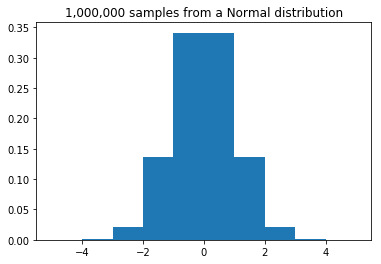

In [2]:
import math
import numpy as np
import scipy as sc
from scipy.stats import norm
import matplotlib.pyplot as plt

def mean(values):
    mean = 0
    for value in values:
        mean += value
    return mean / len(values)


def standard_deviation(values):
    m = mean(values)
    std = 0
    for value in values:
        std += (value - m) ** 2
    std = std / len(values)
    return math.sqrt(std)

mu = 0
sigma = 1
samples = norm.rvs(loc=mu, scale=sigma, size=1000000)
print("mu:", mu)
print("my mean:", mean(samples))
print("numpy mean:", np.mean(samples))
print()
print("sigma:", sigma)
print("standard deviation:", standard_deviation(samples))
print("numpy standard deviation:", np.std(samples))

bins=sc.arange(11) - 5
plt.hist(samples, bins=bins, density=True)
plt.title("1,000,000 samples from a Normal distribution")
plt.show()

Salt Lake City PM2.5 data for 2017.

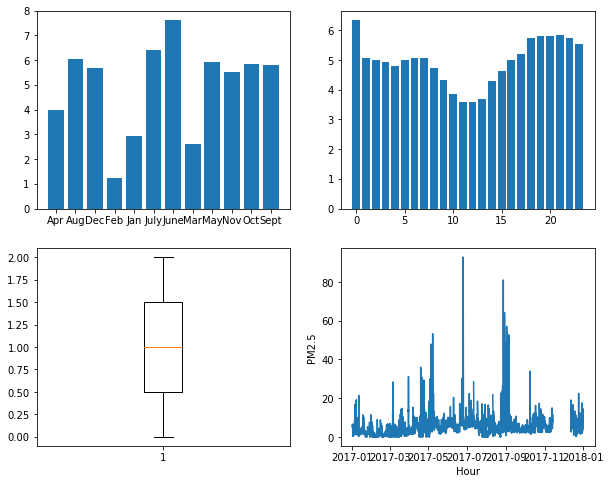

{'boxes': [<matplotlib.lines.Line2D at 0x111a91128>],
 'caps': [<matplotlib.lines.Line2D at 0x11409b668>,
 'fliers': [<matplotlib.lines.Line2D at 0x111a975c0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11409bc88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x111a912e8>,
  <matplotlib.lines.Line2D at 0x11409b128>]}

In [31]:
import pandas as pd

data = pd.read_csv("2017-PM2.5.csv", sep=",")
data = data[['Unnamed: 0', 'HC']].copy()
data = data.rename(columns={'Unnamed: 0' : 'Date'})
data = data.drop(data.index[[0, 1]])
data['Date'] = pd.to_datetime(data['Date'])
data['HC'] = data['HC'].astype(float)
data = data.set_index('Date')

# Each hourly point for the Hurricane station in 2017
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.plot(data['HC'])
plt.show()

fig = plt.figure(figsize=(10, 8))
sub_fig_1 = fig.add_subplot(2,2,1)
sub_fig_2 = fig.add_subplot(2,2,2)
sub_fig_3 = fig.add_subplot(2,2,3)

# Mean for each month
month_means = data.groupby(data.index.month).mean()
sub_fig_1.bar(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"], month_means['HC'])

# Mean for each hour of the day
hour_means = data.groupby(data.index.hour).mean()
sub_fig_2.bar(list(range(24)), hour_means['HC'])

month_groups = data.groupby(data.index.month)
month_lists = []
for group in month_groups:
    month_lists.append(group[1]['HC'])
sub_fig_3.boxplot([0, 1, 2])